In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # to ignore warnings

In [2]:
df = pd.read_csv('data/Telco-Customer-Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data = df.copy()
data.drop(columns=['customerID'], inplace=True)

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [8]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

In [10]:
for col in categorical_cols:
    print(col, data[col].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


Investigating why TotalCharges is of type object. Identifying the index where TotalCharges is not numeric

In [11]:
pd.to_numeric(data['TotalCharges'], errors='coerce').isnull().sum()

## There are 11 rows where TotalCharges is not a number

np.int64(11)

In [12]:
## find index where TotalCharges is not a number
data[pd.to_numeric(data['TotalCharges'], errors='coerce').isnull()]

## TotalCharges is blank for these rows, so we can fill it with null or 0

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
### Investigating why TotalCharges is not numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [14]:
data['TotalCharges'].isnull().sum() # There are still 11 null values in TotalCharges after conversion

np.int64(11)

In [15]:
data[data['TotalCharges'].isnull()==True][['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [16]:
data[data['TotalCharges'].isnull()==False][['tenure','MonthlyCharges','TotalCharges']].head(10)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
5,8,99.65,820.50
6,22,89.10,1949.40
7,10,29.75,301.90
8,28,104.80,3046.05
9,62,56.15,3487.95


Total Charges  = Tenure * Monthly Charges , After coercing to numeric, the NaN values in TotalCharges can be filled with the product of tenure and MonthlyCharges. 
- But the tenure column is 0. Since the tenure is 0, it means that these customers have not been with the company long enough to incur any charges, hence TotalCharges is NaN.
- We can fill these NaN values with 0, as they represent customers who have not been charged anything yet.

In [17]:
data['TotalCharges'].fillna(0, inplace=True)

In [18]:
## Remapping categorical variables and numerical variables
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

In [19]:
numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [20]:
data['SeniorCitizen'].unique()

## senior citizen is a binary variable

array([0, 1])

In [21]:
## Lets find the unique values in each categorical column and see if they need to be remapped
print("Categorical Columns and their unique values:")

for col in categorical_cols:
    print(col, data[col].unique())

Categorical Columns and their unique values:
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


- Map Yes/ No to 1/0
- To handle the columns with [yes, no, No internet service]
    - you can assume No internet service means no backup, support etc is needed. Combine with No and map to 1/0
    - if you suspect different behaviors for No and No internet service, you can perform one hot encoding.

I'm choosing to perform one hot encoding

In [22]:
for col in ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

Using One Hot Encoding techniques to convert the remaining categorical columns

In [23]:

for col in ['gender','MultipleLines', 'InternetService', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 
            'StreamingTV', 'StreamingMovies','Contract','PaymentMethod' ]:
    dummies = pd.get_dummies(data[col], prefix=col, drop_first=False).astype(int)
    data = pd.concat([data, dummies], axis=1)
    data.drop(columns=[col], inplace=True)
    

In [24]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0


## EDA


gender_Female
0    0.504756
1    0.495244
Name: proportion, dtype: float64


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

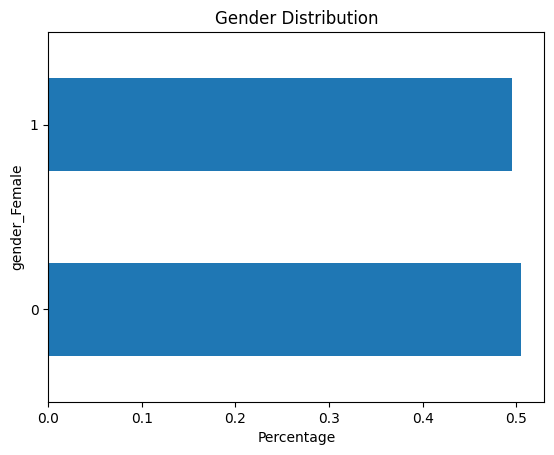

In [25]:
print(data['gender_Female'].value_counts(normalize=True))
(data['gender_Female'].value_counts(normalize=True)).plot(kind='barh')
plt.title('Gender Distribution')
plt.xlabel('Percentage')
plt.ylabel



Text(0.5, 1.0, '% of Senior Citizens')

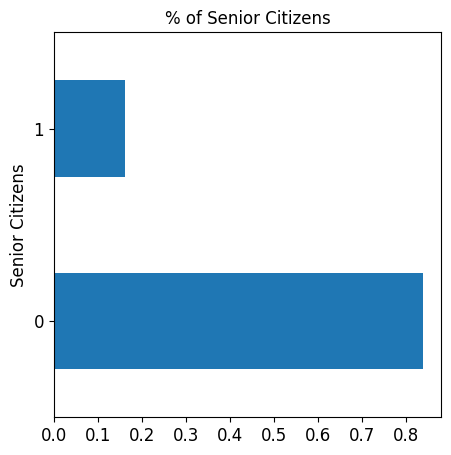

In [26]:
data['SeniorCitizen'].value_counts(normalize=True).plot(kind='barh', figsize=(5, 5), fontsize=12)
plt.ylabel('Senior Citizens', fontsize=12)
plt.title('% of Senior Citizens', fontsize=12)

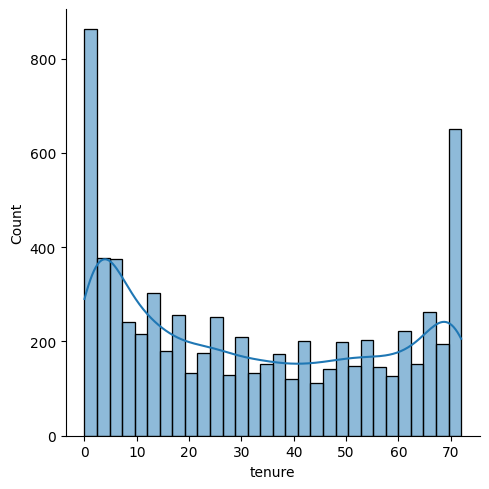

In [27]:
sns.displot(data['tenure'], kde=True, bins=30)

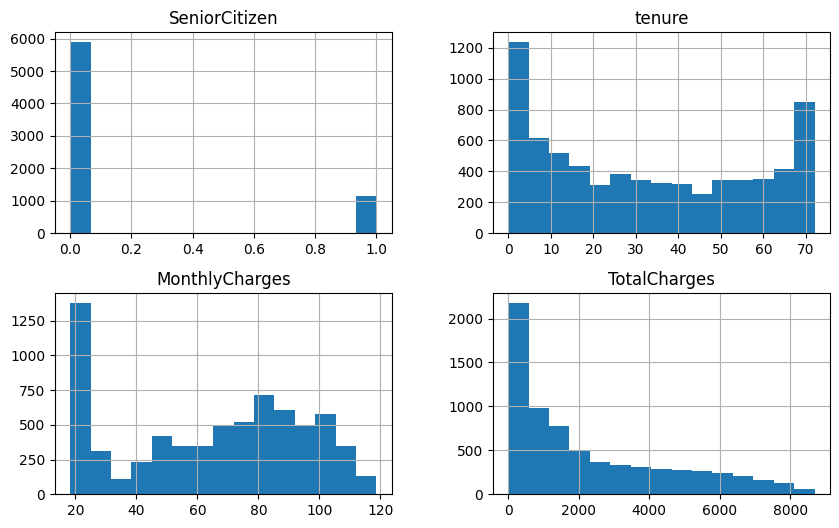

In [28]:
import matplotlib.pyplot as plt

# check distribution of values
data[numerical_cols].hist(figsize=(10,6),bins = 15)
plt.show()

In [29]:
## Check Class Imbalance
print(data['Churn'].value_counts(normalize=True))

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


This distribution tells us:
- ~ 75% of users don't churn, suggesting imbalance. Choose training model and evaluation metrics appropriately

<Axes: >

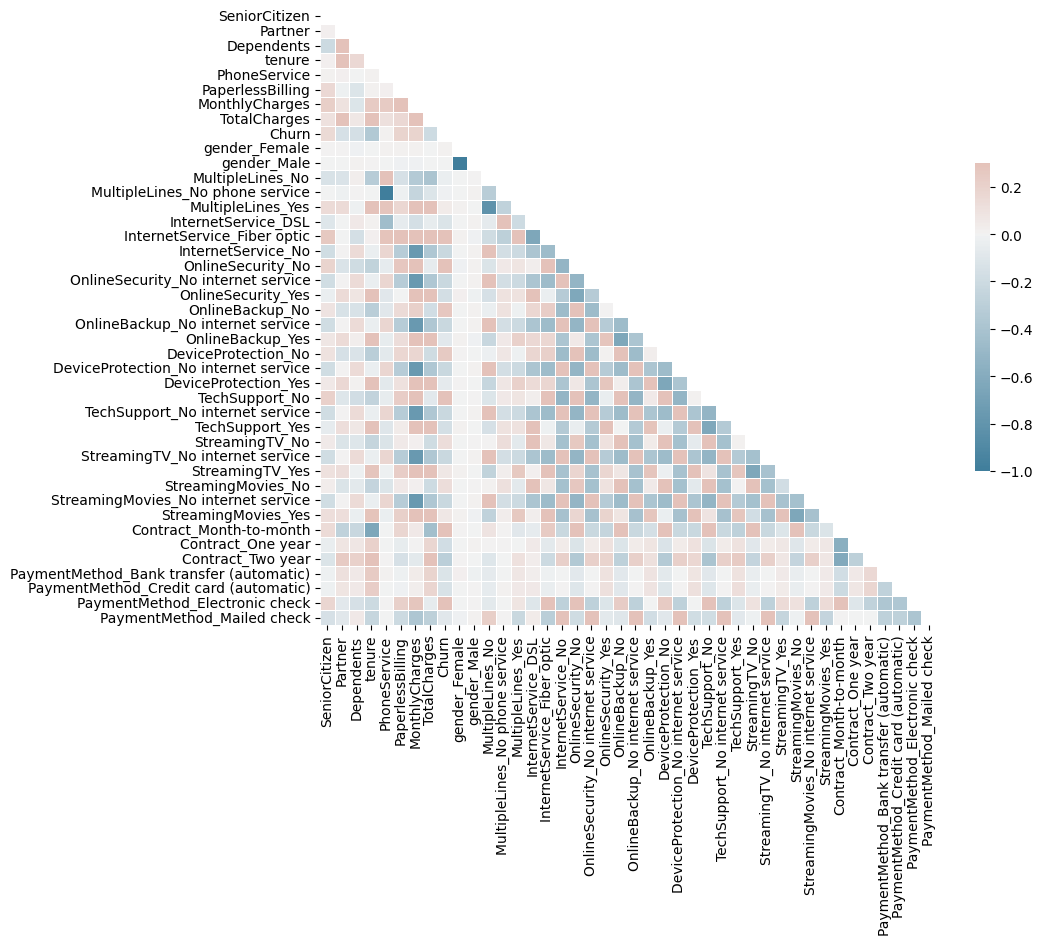

In [30]:
## Insights into relationship between features and target variable
# Churn rate    

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Churn Insights:

- Churn has positive correlation with:

- Contract_Month-to-month

- PaymentMethod_Electronic check

Churn has negative correlation with:

- Contract_Two year

- PaymentMethod_Bank transfer or Credit card

These suggest users with longer-term contracts and automated payments are less likely to churn.

## Modeling




In [31]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score, recall_score,f1_score,roc_auc_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline as ImbPipeline

In [32]:
X = data.drop(columns='Churn', axis=1)
y = data['Churn']

In [33]:
X_train, X_test, y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=101, stratify=y)


In [34]:

print(y_train.value_counts())
scale = y_train.value_counts()[0]/y_train.value_counts()[1]
print("Class Imbalance Scale:", scale)

Churn
0    3622
1    1308
Name: count, dtype: int64
Class Imbalance Scale: 2.7691131498470947


The GradientBoostingClassifier from sklearn.ensemble does not have a direct parameter like scale_pos_weight (used in XGBoost or LightGBM) to handle class imbalance.\
handling the imbalance before training using SMOTE.\
NOTE: If using class_weight = 'balanced' or scale_pos_weight -> avoid using smote for those models and using both technoques will over compensate


In [35]:
from imblearn.over_sampling import SMOTE
models = {
    'RandomForest' : RandomForestClassifier(random_state=42, n_jobs=-1,class_weight='balanced'),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state = 42, use_label_encoder = False, eval_metric = 'logloss', scale_pos_weight=scale),
    'LGBMClassifier': LGBMClassifier(random_state=42, n_jobs=-1, scale_pos_weight=scale)
}
results= {}

for name,model in models.items():
    print(f" ................... Training {name} ...............")
    print("\n")

    # create pipeline. Note: Add Preprocessing steps if needed Ex: scaling
    pipeline =  ImbPipeline(steps=[
        ('classifier',model)
    ])

    if name == 'GradientBoosting':
        # GradientBoostingClassifier does not have scale_pos_weight or class_weight parameter
        # so we will not use SMOTE for this model
        pipeline.steps.insert(-1, ('smote', SMOTE(random_state=42))) # add SMOTE to pipeline
    
    print(pipeline)

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:,-1] # probability of positive class i.e. churn

    accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
    precision = precision_score(y_pred=y_pred, y_true=y_test)
    recall = recall_score(y_pred=y_pred, y_true=y_test)
    f1 = f1_score(y_pred=y_pred, y_true=y_test)
    roc_auc = roc_auc_score(y_test, y_proba)

    results[name] = {
    'Accuracy' : accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'ROC-AUC': roc_auc,
    'Confusion Matrix': confusion_matrix(y_pred=y_pred, y_true=y_test),
    'classification_report': classification_report(y_pred=y_pred, y_true=y_test)

    }

    print(f"{name} Performance")
    print(f"  accuracy: {accuracy:.4f}")
    print(f"  precision: {precision:.4f}")
    print(f"  recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  ROC-AUC score: {roc_auc:.4f}")
    print(f"  Confusion Matrix: \n ",results[name]['Confusion Matrix'])
    print(f"  Classification Report: \n",results[name]['classification_report'])
    print("\n\n")




 ................... Training RandomForest ...............


Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        random_state=42))])
RandomForest Performance
  accuracy: 0.7856
  precision: 0.6222
  recall: 0.4902
  F1-score: 0.5484
  ROC-AUC score: 0.8150
  Confusion Matrix: 
  [[1385  167]
 [ 286  275]]
  Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113




 ................... Training GradientBoosting ...............


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier', GradientBoostingClassifier(random_state=42))])
GradientBoosting Performance
  accuracy: 0.7814

LGBMClassifier seems to perform better than others

At this point we can choose LGBMClassifier as our final model for predicting churn.\
We can further tune the hyperparameters Optuna.\
However, given the current performance, it may not be necessary to do so unless we 

In [36]:
import optuna
from lightgbm import LGBMClassifier , early_stopping
from sklearn.metrics import roc_auc_score , f1_score

def objective(trial):
    param = {
        'objective': 'binary',   
        'verbosity': -1,
        'random_state': 42,
        'n_jobs': -1,
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.2),
        'num_leaves': trial.suggest_int("num_leaves", 20, 150),
        'max_depth': trial.suggest_int("max_depth", 3, 15),
        'min_child_samples': trial.suggest_int("min_child_samples", 10, 100),
        'min_child_weight': trial.suggest_float("min_child_weight", 1e-3, 10),
        'subsample': trial.suggest_float("subsample", 0.6, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.6, 1.0),
        'reg_alpha': trial.suggest_float("reg_alpha", 0.0, 1.0),
        'reg_lambda': trial.suggest_float("reg_lambda", 0.0, 5.0),
        'class_weight': 'balanced',
        'n_estimators': trial.suggest_int("n_estimators", 50, 300, step=50)
    }
    model = LGBMClassifier(**param)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='auc', callbacks=[early_stopping(50)])

    y_pred = model.predict(X_test)  
    f1 = f1_score(y_pred=y_pred, y_true=y_test) 
    return f1


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)


[I 2025-07-11 17:33:41,145] A new study created in memory with name: no-name-d6d2e2c6-b4f0-471a-9f42-85c536b633e7


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.839542	valid_0's binary_logloss: 0.491172


[I 2025-07-11 17:33:41,307] Trial 0 finished with value: 0.6126760563380281 and parameters: {'learning_rate': 0.18753538700317463, 'num_leaves': 119, 'max_depth': 3, 'min_child_samples': 59, 'min_child_weight': 7.462089558429124, 'subsample': 0.9863323697655644, 'colsample_bytree': 0.7864531649035804, 'reg_alpha': 0.5579092019398829, 'reg_lambda': 2.200655840569313, 'n_estimators': 100}. Best is trial 0 with value: 0.6126760563380281.


Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:42,139] Trial 1 finished with value: 0.6239316239316239 and parameters: {'learning_rate': 0.040990757121290196, 'num_leaves': 42, 'max_depth': 11, 'min_child_samples': 61, 'min_child_weight': 4.4225493058735035, 'subsample': 0.7777985347059482, 'colsample_bytree': 0.6130555229577181, 'reg_alpha': 0.442418286183465, 'reg_lambda': 4.114624559965942, 'n_estimators': 100}. Best is trial 1 with value: 0.6239316239316239.


Did not meet early stopping. Best iteration is:
[60]	valid_0's auc: 0.838356	valid_0's binary_logloss: 0.492784
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:42,516] Trial 2 finished with value: 0.6247319513938527 and parameters: {'learning_rate': 0.1648394391584478, 'num_leaves': 134, 'max_depth': 8, 'min_child_samples': 63, 'min_child_weight': 8.84906603399279, 'subsample': 0.751531714962436, 'colsample_bytree': 0.6416834232304026, 'reg_alpha': 0.8998191698724639, 'reg_lambda': 0.28582193551213164, 'n_estimators': 50}. Best is trial 2 with value: 0.6247319513938527.


Did not meet early stopping. Best iteration is:
[15]	valid_0's auc: 0.838598	valid_0's binary_logloss: 0.489972
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:43,452] Trial 3 finished with value: 0.6272273699215966 and parameters: {'learning_rate': 0.06614607763249784, 'num_leaves': 103, 'max_depth': 15, 'min_child_samples': 76, 'min_child_weight': 0.9220317926707735, 'subsample': 0.7124781156001465, 'colsample_bytree': 0.9212130774878401, 'reg_alpha': 0.988191961220256, 'reg_lambda': 3.471455045805568, 'n_estimators': 250}. Best is trial 3 with value: 0.6272273699215966.


Early stopping, best iteration is:
[51]	valid_0's auc: 0.838753	valid_0's binary_logloss: 0.488748
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:44,012] Trial 4 finished with value: 0.6197387518142236 and parameters: {'learning_rate': 0.16988816836996876, 'num_leaves': 134, 'max_depth': 13, 'min_child_samples': 59, 'min_child_weight': 6.918316356577876, 'subsample': 0.8373036887311519, 'colsample_bytree': 0.9730471892664051, 'reg_alpha': 0.22821161029423842, 'reg_lambda': 0.35123436076594683, 'n_estimators': 200}. Best is trial 3 with value: 0.6272273699215966.


Early stopping, best iteration is:
[10]	valid_0's auc: 0.838492	valid_0's binary_logloss: 0.496064
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:45,443] Trial 5 finished with value: 0.6215429403202329 and parameters: {'learning_rate': 0.035924792285275904, 'num_leaves': 73, 'max_depth': 12, 'min_child_samples': 24, 'min_child_weight': 4.358521897921918, 'subsample': 0.6746273354663315, 'colsample_bytree': 0.7645177953515025, 'reg_alpha': 0.2930304636027794, 'reg_lambda': 3.6235773127701396, 'n_estimators': 200}. Best is trial 3 with value: 0.6272273699215966.


Early stopping, best iteration is:
[61]	valid_0's auc: 0.835382	valid_0's binary_logloss: 0.493766
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:45,955] Trial 6 finished with value: 0.6204431736954967 and parameters: {'learning_rate': 0.14608111323921216, 'num_leaves': 47, 'max_depth': 8, 'min_child_samples': 43, 'min_child_weight': 6.722108976521015, 'subsample': 0.758353581003925, 'colsample_bytree': 0.7861113266230063, 'reg_alpha': 0.6107416228538632, 'reg_lambda': 2.2223348491702337, 'n_estimators': 200}. Best is trial 3 with value: 0.6272273699215966.


Early stopping, best iteration is:
[13]	valid_0's auc: 0.837002	valid_0's binary_logloss: 0.498264
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:47,243] Trial 7 finished with value: 0.6242857142857143 and parameters: {'learning_rate': 0.018867646480158633, 'num_leaves': 21, 'max_depth': 10, 'min_child_samples': 48, 'min_child_weight': 0.36429444326135757, 'subsample': 0.8662596222675607, 'colsample_bytree': 0.8841439363384442, 'reg_alpha': 0.6044999466590342, 'reg_lambda': 0.6197429672060067, 'n_estimators': 300}. Best is trial 3 with value: 0.6272273699215966.


Early stopping, best iteration is:
[173]	valid_0's auc: 0.839859	valid_0's binary_logloss: 0.486387
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:47,525] Trial 8 finished with value: 0.6235632183908046 and parameters: {'learning_rate': 0.1360677569685854, 'num_leaves': 44, 'max_depth': 6, 'min_child_samples': 30, 'min_child_weight': 6.496645486400079, 'subsample': 0.7567501975682882, 'colsample_bytree': 0.8251690721970881, 'reg_alpha': 0.1825831769335009, 'reg_lambda': 1.7543234285609377, 'n_estimators': 50}. Best is trial 3 with value: 0.6272273699215966.


Did not meet early stopping. Best iteration is:
[16]	valid_0's auc: 0.839381	valid_0's binary_logloss: 0.491321
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:48,275] Trial 9 finished with value: 0.6247319513938527 and parameters: {'learning_rate': 0.06298618147595311, 'num_leaves': 33, 'max_depth': 9, 'min_child_samples': 66, 'min_child_weight': 4.3862022868729715, 'subsample': 0.6621205843619404, 'colsample_bytree': 0.665505888177681, 'reg_alpha': 0.48882439053641913, 'reg_lambda': 4.949206276152244, 'n_estimators': 300}. Best is trial 3 with value: 0.6272273699215966.


Early stopping, best iteration is:
[55]	valid_0's auc: 0.838505	valid_0's binary_logloss: 0.488488
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:49,147] Trial 10 finished with value: 0.6297627606038821 and parameters: {'learning_rate': 0.08357780276947713, 'num_leaves': 99, 'max_depth': 14, 'min_child_samples': 93, 'min_child_weight': 0.5742030675754779, 'subsample': 0.6031879588754891, 'colsample_bytree': 0.9878660462273061, 'reg_alpha': 0.9926056614004183, 'reg_lambda': 3.428564986409658, 'n_estimators': 250}. Best is trial 10 with value: 0.6297627606038821.


Early stopping, best iteration is:
[56]	valid_0's auc: 0.839096	valid_0's binary_logloss: 0.486186
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:49,958] Trial 11 finished with value: 0.6284896206156049 and parameters: {'learning_rate': 0.09094457345998695, 'num_leaves': 98, 'max_depth': 15, 'min_child_samples': 97, 'min_child_weight': 0.05636262231449052, 'subsample': 0.6270188482814804, 'colsample_bytree': 0.9918943323745039, 'reg_alpha': 0.9727491446748516, 'reg_lambda': 3.3431028229657827, 'n_estimators': 250}. Best is trial 10 with value: 0.6297627606038821.


Early stopping, best iteration is:
[57]	valid_0's auc: 0.84068	valid_0's binary_logloss: 0.483665
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:50,573] Trial 12 finished with value: 0.6318051575931232 and parameters: {'learning_rate': 0.10222725968844501, 'num_leaves': 86, 'max_depth': 15, 'min_child_samples': 99, 'min_child_weight': 2.10300082267354, 'subsample': 0.6030786010350274, 'colsample_bytree': 0.9940787586020353, 'reg_alpha': 0.8050500375110863, 'reg_lambda': 3.0752627498184704, 'n_estimators': 250}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[40]	valid_0's auc: 0.839512	valid_0's binary_logloss: 0.486515
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:51,182] Trial 13 finished with value: 0.6280400572246065 and parameters: {'learning_rate': 0.10835915434084105, 'num_leaves': 73, 'max_depth': 13, 'min_child_samples': 100, 'min_child_weight': 2.3956427471518262, 'subsample': 0.6228373556345906, 'colsample_bytree': 0.9132989040891626, 'reg_alpha': 0.7971626357017976, 'reg_lambda': 2.8678932797631695, 'n_estimators': 250}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[33]	valid_0's auc: 0.839161	valid_0's binary_logloss: 0.487421
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:51,809] Trial 14 finished with value: 0.6229508196721312 and parameters: {'learning_rate': 0.107561870235556, 'num_leaves': 88, 'max_depth': 15, 'min_child_samples': 84, 'min_child_weight': 2.4428344775258957, 'subsample': 0.6122141237041516, 'colsample_bytree': 0.9572290093180235, 'reg_alpha': 0.776223843234717, 'reg_lambda': 4.684891985429486, 'n_estimators': 300}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[26]	valid_0's auc: 0.838428	valid_0's binary_logloss: 0.491675
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:52,348] Trial 15 finished with value: 0.6254493170381021 and parameters: {'learning_rate': 0.08671287076767031, 'num_leaves': 66, 'max_depth': 13, 'min_child_samples': 84, 'min_child_weight': 1.8409779300503102, 'subsample': 0.9150779961143646, 'colsample_bytree': 0.8563233080119828, 'reg_alpha': 0.7566098450906058, 'reg_lambda': 1.6135355798541184, 'n_estimators': 150}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[39]	valid_0's auc: 0.839037	valid_0's binary_logloss: 0.486104
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:52,893] Trial 16 finished with value: 0.6275911365260901 and parameters: {'learning_rate': 0.12756159689358618, 'num_leaves': 114, 'max_depth': 14, 'min_child_samples': 85, 'min_child_weight': 3.272008205213787, 'subsample': 0.6883452408684815, 'colsample_bytree': 0.9991912340469292, 'reg_alpha': 0.037620922380151356, 'reg_lambda': 2.7482043421875013, 'n_estimators': 250}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[15]	valid_0's auc: 0.839579	valid_0's binary_logloss: 0.496008
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:53,439] Trial 17 finished with value: 0.6252676659528907 and parameters: {'learning_rate': 0.07887397338342644, 'num_leaves': 149, 'max_depth': 11, 'min_child_samples': 91, 'min_child_weight': 1.3209336494416122, 'subsample': 0.7160476151957438, 'colsample_bytree': 0.7294542689116249, 'reg_alpha': 0.861927586143828, 'reg_lambda': 4.122233302352955, 'n_estimators': 150}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[46]	valid_0's auc: 0.83919	valid_0's binary_logloss: 0.488789
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:53,793] Trial 18 finished with value: 0.6276445698166432 and parameters: {'learning_rate': 0.11465308404648952, 'num_leaves': 61, 'max_depth': 5, 'min_child_samples': 10, 'min_child_weight': 3.370331898891057, 'subsample': 0.6041134892329675, 'colsample_bytree': 0.9322369930341168, 'reg_alpha': 0.7049554702138321, 'reg_lambda': 1.1897956621006978, 'n_estimators': 250}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[19]	valid_0's auc: 0.838159	valid_0's binary_logloss: 0.494447
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:54,433] Trial 19 finished with value: 0.625089605734767 and parameters: {'learning_rate': 0.057608073966000276, 'num_leaves': 90, 'max_depth': 14, 'min_child_samples': 73, 'min_child_weight': 3.0530791606760643, 'subsample': 0.6538346448396918, 'colsample_bytree': 0.8621432642662711, 'reg_alpha': 0.8969837185228287, 'reg_lambda': 3.084159684312418, 'n_estimators': 300}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[68]	valid_0's auc: 0.838102	valid_0's binary_logloss: 0.487714
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:55,160] Trial 20 finished with value: 0.6197991391678622 and parameters: {'learning_rate': 0.09643913288843096, 'num_leaves': 108, 'max_depth': 12, 'min_child_samples': 74, 'min_child_weight': 5.6260077181293, 'subsample': 0.8050172818093273, 'colsample_bytree': 0.7119021713920408, 'reg_alpha': 0.6996262563118681, 'reg_lambda': 4.0113239723945515, 'n_estimators': 200}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[43]	valid_0's auc: 0.838656	valid_0's binary_logloss: 0.487283
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:55,653] Trial 21 finished with value: 0.6279569892473118 and parameters: {'learning_rate': 0.0836647476902122, 'num_leaves': 98, 'max_depth': 15, 'min_child_samples': 98, 'min_child_weight': 0.036146382864176284, 'subsample': 0.6364800620578298, 'colsample_bytree': 0.9940120213911348, 'reg_alpha': 0.9875038490199317, 'reg_lambda': 3.331079033580435, 'n_estimators': 250}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[44]	valid_0's auc: 0.839341	valid_0's binary_logloss: 0.488091
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:56,266] Trial 22 finished with value: 0.6301564722617354 and parameters: {'learning_rate': 0.0980739804812208, 'num_leaves': 89, 'max_depth': 14, 'min_child_samples': 94, 'min_child_weight': 1.0497626342374256, 'subsample': 0.6019799501750627, 'colsample_bytree': 0.9501311031933293, 'reg_alpha': 0.9965276842228568, 'reg_lambda': 2.6001450162088164, 'n_estimators': 250}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[37]	valid_0's auc: 0.838615	valid_0's binary_logloss: 0.488213
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:56,907] Trial 23 finished with value: 0.6237482117310443 and parameters: {'learning_rate': 0.1238578250170022, 'num_leaves': 80, 'max_depth': 14, 'min_child_samples': 90, 'min_child_weight': 1.2962250060730591, 'subsample': 0.7052109288604015, 'colsample_bytree': 0.9452296526876935, 'reg_alpha': 0.8606877529664617, 'reg_lambda': 2.480814870585012, 'n_estimators': 200}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[34]	valid_0's auc: 0.837963	valid_0's binary_logloss: 0.487357
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:57,493] Trial 24 finished with value: 0.6231155778894473 and parameters: {'learning_rate': 0.14739938560465315, 'num_leaves': 88, 'max_depth': 12, 'min_child_samples': 92, 'min_child_weight': 1.9854400815356823, 'subsample': 0.6005829785202492, 'colsample_bytree': 0.9002645761906443, 'reg_alpha': 0.927230738014508, 'reg_lambda': 2.5541586866497457, 'n_estimators': 300}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[28]	valid_0's auc: 0.838179	valid_0's binary_logloss: 0.487306
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:58,499] Trial 25 finished with value: 0.624910007199424 and parameters: {'learning_rate': 0.07415461177083024, 'num_leaves': 125, 'max_depth': 14, 'min_child_samples': 79, 'min_child_weight': 1.1325833657402973, 'subsample': 0.6531158878390675, 'colsample_bytree': 0.9608670000091556, 'reg_alpha': 0.8315402687445824, 'reg_lambda': 3.7014517176244586, 'n_estimators': 250}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[57]	valid_0's auc: 0.839216	valid_0's binary_logloss: 0.485338
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:59,208] Trial 26 finished with value: 0.6236559139784946 and parameters: {'learning_rate': 0.05000682075640216, 'num_leaves': 64, 'max_depth': 13, 'min_child_samples': 100, 'min_child_weight': 0.7965507945598764, 'subsample': 0.6829938719511215, 'colsample_bytree': 0.9571060011720202, 'reg_alpha': 0.9991260799656281, 'reg_lambda': 1.9455565141744144, 'n_estimators': 150}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[86]	valid_0's auc: 0.839339	valid_0's binary_logloss: 0.485572
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:33:59,774] Trial 27 finished with value: 0.6255380200860832 and parameters: {'learning_rate': 0.09954074085598408, 'num_leaves': 80, 'max_depth': 11, 'min_child_samples': 91, 'min_child_weight': 9.795968047651577, 'subsample': 0.7313426664362804, 'colsample_bytree': 0.8806844450681037, 'reg_alpha': 0.6968956083826003, 'reg_lambda': 3.0242439248927355, 'n_estimators': 250}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[38]	valid_0's auc: 0.83818	valid_0's binary_logloss: 0.487122
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:00,347] Trial 28 finished with value: 0.6275911365260901 and parameters: {'learning_rate': 0.12221966189715977, 'num_leaves': 98, 'max_depth': 10, 'min_child_samples': 71, 'min_child_weight': 2.8054414719901626, 'subsample': 0.6412995502804723, 'colsample_bytree': 0.8331210744043719, 'reg_alpha': 0.9381250828612101, 'reg_lambda': 1.246301711418984, 'n_estimators': 200}. Best is trial 12 with value: 0.6318051575931232.
[I 2025-07-11 17:34:00,527] Trial 29 finished with value: 0.6189473684210526 and parameters: {'learning_rate': 0.18617563007412433, 'num_leaves': 116, 'max_depth': 3, 'min_child_samples': 52, 'min_child_weight': 3.661336124199279, 'subsample': 0.9508864064138558, 'colsample_bytree': 0.9751858235824975, 'reg_alpha': 0.4118343163048108, 'reg_lambda': 2.359614505143896, 'n_estimators': 300}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[20]	valid_0's auc: 0.839527	valid_0's binary_logloss: 0.490093
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.838007	valid_0's binary_logloss: 0.492408
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:00,933] Trial 30 finished with value: 0.6278089887640449 and parameters: {'learning_rate': 0.02110106696975718, 'num_leaves': 55, 'max_depth': 14, 'min_child_samples': 81, 'min_child_weight': 1.6643685568056819, 'subsample': 0.8855621110947648, 'colsample_bytree': 0.9298011058499571, 'reg_alpha': 0.6021794459207921, 'reg_lambda': 4.45786905974112, 'n_estimators': 100}. Best is trial 12 with value: 0.6318051575931232.


Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.837622	valid_0's binary_logloss: 0.498181
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:01,488] Trial 31 finished with value: 0.622412562455389 and parameters: {'learning_rate': 0.09046681716855264, 'num_leaves': 95, 'max_depth': 15, 'min_child_samples': 96, 'min_child_weight': 0.5186400523170209, 'subsample': 0.6237743109027024, 'colsample_bytree': 0.992854259815926, 'reg_alpha': 0.937620849408391, 'reg_lambda': 3.243453467719061, 'n_estimators': 250}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[51]	valid_0's auc: 0.838525	valid_0's binary_logloss: 0.48628
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:01,891] Trial 32 finished with value: 0.6254442075337597 and parameters: {'learning_rate': 0.09958314068627012, 'num_leaves': 108, 'max_depth': 15, 'min_child_samples': 94, 'min_child_weight': 0.04545554741159252, 'subsample': 0.6006141549767827, 'colsample_bytree': 0.9746464922196464, 'reg_alpha': 0.8444234127600461, 'reg_lambda': 3.7731285509748678, 'n_estimators': 250}. Best is trial 12 with value: 0.6318051575931232.


Early stopping, best iteration is:
[35]	valid_0's auc: 0.84027	valid_0's binary_logloss: 0.486087
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:02,727] Trial 33 finished with value: 0.6325648414985591 and parameters: {'learning_rate': 0.06924985862212868, 'num_leaves': 80, 'max_depth': 14, 'min_child_samples': 86, 'min_child_weight': 0.6884768846059918, 'subsample': 0.6376330201625828, 'colsample_bytree': 0.999090066127781, 'reg_alpha': 0.9267240342006257, 'reg_lambda': 2.781862022826875, 'n_estimators': 250}. Best is trial 33 with value: 0.6325648414985591.


Early stopping, best iteration is:
[54]	valid_0's auc: 0.839006	valid_0's binary_logloss: 0.486701
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:03,292] Trial 34 finished with value: 0.6270579813886901 and parameters: {'learning_rate': 0.07110572164723628, 'num_leaves': 79, 'max_depth': 13, 'min_child_samples': 89, 'min_child_weight': 2.2920805690623176, 'subsample': 0.6465407338350806, 'colsample_bytree': 0.9406910927566388, 'reg_alpha': 0.9001517584372364, 'reg_lambda': 2.745702450614687, 'n_estimators': 200}. Best is trial 33 with value: 0.6325648414985591.


Early stopping, best iteration is:
[56]	valid_0's auc: 0.838749	valid_0's binary_logloss: 0.486663
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:04,000] Trial 35 finished with value: 0.6235632183908046 and parameters: {'learning_rate': 0.046243596190500814, 'num_leaves': 123, 'max_depth': 12, 'min_child_samples': 69, 'min_child_weight': 0.8798369227895679, 'subsample': 0.796429022058925, 'colsample_bytree': 0.9113758159823616, 'reg_alpha': 0.754759887844253, 'reg_lambda': 2.0675518679117646, 'n_estimators': 300}. Best is trial 33 with value: 0.6325648414985591.


Early stopping, best iteration is:
[72]	valid_0's auc: 0.838775	valid_0's binary_logloss: 0.486347
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:05,299] Trial 36 finished with value: 0.6302943287867911 and parameters: {'learning_rate': 0.029790902349469517, 'num_leaves': 72, 'max_depth': 14, 'min_child_samples': 87, 'min_child_weight': 5.278150751446293, 'subsample': 0.6770016840604802, 'colsample_bytree': 0.9783127081330362, 'reg_alpha': 0.8241524940936873, 'reg_lambda': 2.610445922613012, 'n_estimators': 250}. Best is trial 33 with value: 0.6325648414985591.


Early stopping, best iteration is:
[122]	valid_0's auc: 0.839181	valid_0's binary_logloss: 0.486316
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:06,131] Trial 37 finished with value: 0.630901287553648 and parameters: {'learning_rate': 0.03498568075012956, 'num_leaves': 72, 'max_depth': 11, 'min_child_samples': 80, 'min_child_weight': 5.37611827525543, 'subsample': 0.6762798209187034, 'colsample_bytree': 0.9652263159667143, 'reg_alpha': 0.6369891258118107, 'reg_lambda': 2.674855937827752, 'n_estimators': 200}. Best is trial 33 with value: 0.6325648414985591.


Early stopping, best iteration is:
[88]	valid_0's auc: 0.839284	valid_0's binary_logloss: 0.487332
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:07,205] Trial 38 finished with value: 0.6284896206156049 and parameters: {'learning_rate': 0.03222499357428691, 'num_leaves': 54, 'max_depth': 10, 'min_child_samples': 77, 'min_child_weight': 5.354527036443321, 'subsample': 0.6969985379291919, 'colsample_bytree': 0.969073943433462, 'reg_alpha': 0.6583211445055223, 'reg_lambda': 2.9786438752525353, 'n_estimators': 200}. Best is trial 33 with value: 0.6325648414985591.


Early stopping, best iteration is:
[100]	valid_0's auc: 0.839811	valid_0's binary_logloss: 0.486504
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:08,349] Trial 39 finished with value: 0.6245564229950319 and parameters: {'learning_rate': 0.010627447671416542, 'num_leaves': 71, 'max_depth': 7, 'min_child_samples': 61, 'min_child_weight': 7.619642431836143, 'subsample': 0.729862246515881, 'colsample_bytree': 0.8934995747483641, 'reg_alpha': 0.45952906287681405, 'reg_lambda': 2.138163200771552, 'n_estimators': 200}. Best is trial 33 with value: 0.6325648414985591.


Did not meet early stopping. Best iteration is:
[198]	valid_0's auc: 0.839181	valid_0's binary_logloss: 0.493708
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:08,980] Trial 40 finished with value: 0.6274787535410765 and parameters: {'learning_rate': 0.030870707299577256, 'num_leaves': 56, 'max_depth': 11, 'min_child_samples': 86, 'min_child_weight': 5.903557395023636, 'subsample': 0.6766285372969706, 'colsample_bytree': 0.9155668239334779, 'reg_alpha': 0.54756375423441, 'reg_lambda': 1.7990021529272013, 'n_estimators': 150}. Best is trial 33 with value: 0.6325648414985591.


Early stopping, best iteration is:
[71]	valid_0's auc: 0.839318	valid_0's binary_logloss: 0.493378
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:09,813] Trial 41 finished with value: 0.6258890469416786 and parameters: {'learning_rate': 0.05858874618714868, 'num_leaves': 83, 'max_depth': 13, 'min_child_samples': 81, 'min_child_weight': 4.813740520529631, 'subsample': 0.6667584438889682, 'colsample_bytree': 0.9453120603482843, 'reg_alpha': 0.8170691837867234, 'reg_lambda': 2.5881191882699772, 'n_estimators': 250}. Best is trial 33 with value: 0.6325648414985591.


Early stopping, best iteration is:
[53]	valid_0's auc: 0.837959	valid_0's binary_logloss: 0.489279
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:10,864] Trial 42 finished with value: 0.631879914224446 and parameters: {'learning_rate': 0.04072379115253735, 'num_leaves': 70, 'max_depth': 12, 'min_child_samples': 88, 'min_child_weight': 6.196862408667782, 'subsample': 0.6331793470598504, 'colsample_bytree': 0.975760983321555, 'reg_alpha': 0.8877723604506412, 'reg_lambda': 2.357188274572396, 'n_estimators': 250}. Best is trial 33 with value: 0.6325648414985591.


Early stopping, best iteration is:
[93]	valid_0's auc: 0.83899	valid_0's binary_logloss: 0.486303
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:11,556] Trial 43 finished with value: 0.6318051575931232 and parameters: {'learning_rate': 0.03982434209333152, 'num_leaves': 71, 'max_depth': 9, 'min_child_samples': 87, 'min_child_weight': 7.687937708096326, 'subsample': 0.6667465786404629, 'colsample_bytree': 0.9803393176631704, 'reg_alpha': 0.7285045567028078, 'reg_lambda': 2.2951023602167595, 'n_estimators': 200}. Best is trial 33 with value: 0.6325648414985591.


Early stopping, best iteration is:
[96]	valid_0's auc: 0.839094	valid_0's binary_logloss: 0.486027
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:12,263] Trial 44 finished with value: 0.6234875444839858 and parameters: {'learning_rate': 0.042627290729683714, 'num_leaves': 67, 'max_depth': 9, 'min_child_samples': 65, 'min_child_weight': 7.922299970792934, 'subsample': 0.6406658009498036, 'colsample_bytree': 0.9707887285475826, 'reg_alpha': 0.6481106112874947, 'reg_lambda': 2.3456624306039955, 'n_estimators': 200}. Best is trial 33 with value: 0.6325648414985591.


Early stopping, best iteration is:
[56]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.490145
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:13,027] Trial 45 finished with value: 0.6336917562724015 and parameters: {'learning_rate': 0.05372021155354543, 'num_leaves': 50, 'max_depth': 9, 'min_child_samples': 78, 'min_child_weight': 6.191038311943995, 'subsample': 0.6635324025045397, 'colsample_bytree': 0.9974161003960688, 'reg_alpha': 0.7332687687172106, 'reg_lambda': 3.117095023700406, 'n_estimators': 100}. Best is trial 45 with value: 0.6336917562724015.


Did not meet early stopping. Best iteration is:
[64]	valid_0's auc: 0.839098	valid_0's binary_logloss: 0.486618
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:13,440] Trial 46 finished with value: 0.6217765042979942 and parameters: {'learning_rate': 0.05412655378371914, 'num_leaves': 41, 'max_depth': 8, 'min_child_samples': 34, 'min_child_weight': 6.804963409930563, 'subsample': 0.6226016034047402, 'colsample_bytree': 0.9934039276890054, 'reg_alpha': 0.7560725126498516, 'reg_lambda': 3.0551743265750844, 'n_estimators': 50}. Best is trial 45 with value: 0.6336917562724015.


Did not meet early stopping. Best iteration is:
[44]	valid_0's auc: 0.835657	valid_0's binary_logloss: 0.494062
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:14,181] Trial 47 finished with value: 0.6225736879942487 and parameters: {'learning_rate': 0.06725931553468398, 'num_leaves': 49, 'max_depth': 9, 'min_child_samples': 76, 'min_child_weight': 6.083543231015496, 'subsample': 0.7395425500182772, 'colsample_bytree': 0.8060763592912951, 'reg_alpha': 0.5601625888416946, 'reg_lambda': 1.5655748087329604, 'n_estimators': 100}. Best is trial 45 with value: 0.6336917562724015.


Did not meet early stopping. Best iteration is:
[53]	valid_0's auc: 0.839733	valid_0's binary_logloss: 0.485065
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:14,738] Trial 48 finished with value: 0.6213729653220099 and parameters: {'learning_rate': 0.04255123729613744, 'num_leaves': 21, 'max_depth': 8, 'min_child_samples': 83, 'min_child_weight': 8.25903916574948, 'subsample': 0.7679048384623611, 'colsample_bytree': 0.6284573202896582, 'reg_alpha': 0.3948236288558009, 'reg_lambda': 3.4865114367535215, 'n_estimators': 100}. Best is trial 45 with value: 0.6336917562724015.


Did not meet early stopping. Best iteration is:
[97]	valid_0's auc: 0.839886	valid_0's binary_logloss: 0.487329
Training until validation scores don't improve for 50 rounds


[I 2025-07-11 17:34:15,027] Trial 49 finished with value: 0.625 and parameters: {'learning_rate': 0.06480613092958643, 'num_leaves': 35, 'max_depth': 7, 'min_child_samples': 56, 'min_child_weight': 7.352188238492285, 'subsample': 0.7137849039271817, 'colsample_bytree': 0.9238459787582143, 'reg_alpha': 0.7315303816367611, 'reg_lambda': 0.00931038674781881, 'n_estimators': 50}. Best is trial 45 with value: 0.6336917562724015.


Did not meet early stopping. Best iteration is:
[43]	valid_0's auc: 0.838297	valid_0's binary_logloss: 0.486968


In [37]:

# Best result
print("✅ Best F1-score:", study.best_value)
print("🧠 Best Params:", study.best_params)

✅ Best F1-score: 0.6336917562724015
🧠 Best Params: {'learning_rate': 0.05372021155354543, 'num_leaves': 50, 'max_depth': 9, 'min_child_samples': 78, 'min_child_weight': 6.191038311943995, 'subsample': 0.6635324025045397, 'colsample_bytree': 0.9974161003960688, 'reg_alpha': 0.7332687687172106, 'reg_lambda': 3.117095023700406, 'n_estimators': 100}


In [38]:
best_params = study.best_params
best_params.update({'random_state': 42, 'n_jobs': -1, 'class_weight': 'balanced', 'verbosity': -1, 'objective': 'binary', 'boosting_type': 'gbdt'})

In [39]:
best_params

{'learning_rate': 0.05372021155354543,
 'num_leaves': 50,
 'max_depth': 9,
 'min_child_samples': 78,
 'min_child_weight': 6.191038311943995,
 'subsample': 0.6635324025045397,
 'colsample_bytree': 0.9974161003960688,
 'reg_alpha': 0.7332687687172106,
 'reg_lambda': 3.117095023700406,
 'n_estimators': 100,
 'random_state': 42,
 'n_jobs': -1,
 'class_weight': 'balanced',
 'verbosity': -1,
 'objective': 'binary',
 'boosting_type': 'gbdt'}

In [40]:
## Retraining the model with best parameters

final_model = LGBMClassifier(**best_params)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:,-1] # probability of positive class i.e. churn

print("Final Model Performance")
print(f"  accuracy: {accuracy_score(y_pred=y_pred, y_true=y_test):.4f}")
print(f"  precision: {precision_score(y_pred=y_pred, y_true=y_test):.4f}")
print(f"  recall: {recall_score(y_pred=y_pred, y_true=y_test):.4f}")
print(f"  F1-score: {f1_score(y_pred=y_pred, y_true=y_test):.4f}")
print(f"  ROC-AUC score: {roc_auc_score(y_test, y_proba):.4f}")


Final Model Performance
  accuracy: 0.7596
  precision: 0.5325
  recall: 0.7736
  F1-score: 0.6308
  ROC-AUC score: 0.8369


Best threshold: 0.5051
Best F1 score: 0.6331


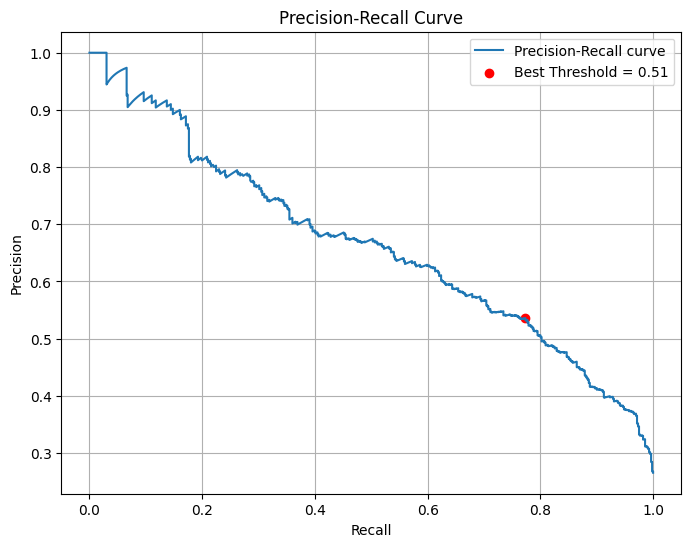

In [41]:
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Assume these are your true labels and predicted probabilities for the positive class
# y_test = ...
# y_proba = model.predict_proba(X_test)[:, 1]

# Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# Find the best threshold with the highest F1 score
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best threshold: {best_threshold:.4f}")
print(f"Best F1 score: {best_f1:.4f}")

# Plot the Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label="Precision-Recall curve")
plt.scatter(recall[best_idx], precision[best_idx], color='red', label=f"Best Threshold = {best_threshold:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


In [42]:
y_pred_final = (y_proba >= best_threshold).astype(int)
f1 = f1_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
accuracy = accuracy_score(y_test, y_pred_final)
cm = confusion_matrix(y_test, y_pred_final)

print(f"✅ Evaluation with Best Threshold ({best_threshold:.2f}):")
print(f"F1 Score     : {f1:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Confusion Matrix:\n{cm}")




✅ Evaluation with Best Threshold (0.51):
F1 Score     : 0.6331
Precision    : 0.5358
Recall       : 0.7736
Accuracy     : 0.7619
Confusion Matrix:
[[1176  376]
 [ 127  434]]


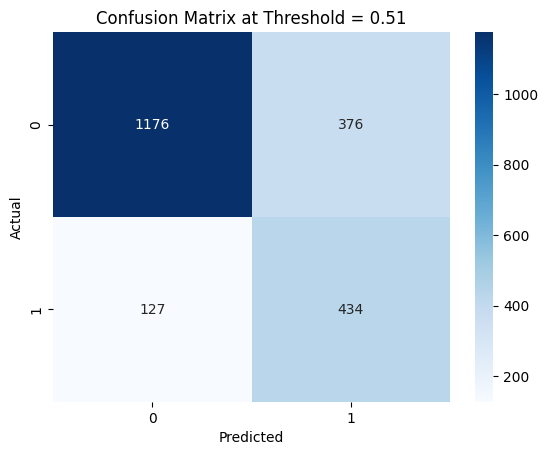

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix at Threshold = {best_threshold:.2f}")
plt.show()


In [44]:
best_params

{'learning_rate': 0.05372021155354543,
 'num_leaves': 50,
 'max_depth': 9,
 'min_child_samples': 78,
 'min_child_weight': 6.191038311943995,
 'subsample': 0.6635324025045397,
 'colsample_bytree': 0.9974161003960688,
 'reg_alpha': 0.7332687687172106,
 'reg_lambda': 3.117095023700406,
 'n_estimators': 100,
 'random_state': 42,
 'n_jobs': -1,
 'class_weight': 'balanced',
 'verbosity': -1,
 'objective': 'binary',
 'boosting_type': 'gbdt'}

In [45]:
import joblib
import os

# Combine into a dictionary
save_bundle = {
    'model': final_model,
    'best_params': best_params,
    'threshold': best_threshold,
    'metrics': {
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy
    }
}
# Dump to file
folder_path = 'model'
file_path = os.path.join(folder_path, 'model_bundle.joblib')
os.makedirs(folder_path, exist_ok=True)
joblib.dump(save_bundle, file_path)


['model/model_bundle.joblib']